<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/Proyecci%C3%B3nVectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code to compare the analytical and iterative (gradient descent) solutions for projecting one vector onto another. The code should include step-by-step explanations, numerical comparison of the results, a plot showing the original vectors and both projections, and a plot illustrating the gradient descent process on the cost function.

## Definición de vectores

### Subtask:
Definir los dos vectores con los que trabajaremos para la proyección.


**Reasoning**:
Define the two vectors using numpy and print them.



In [ ]:
import numpy as np

# Define the two vectors
v = np.array([3, 3])
w = np.array([3, 3])

# Print the vectors
print("Vector v:", v)
print("Vector w:", w)

Vector v: [3 3]
Vector w: [3 3]


## Solución analítica

### Subtask:
Calcular la proyección del primer vector sobre el segundo utilizando la fórmula analítica.


**Reasoning**:
Calculate the analytical projection of vector v onto vector w following the provided steps.



In [ ]:
# Calculate the dot product of v and w
dot_product_vw = np.dot(v, w)

# Calculate the dot product of w with itself (squared L2 norm of w)
dot_product_ww = np.dot(w, w)

# Calculate the scalar projection of v onto w
scalar_projection = dot_product_vw / dot_product_ww

# Calculate the vector projection of v onto w
vector_projection_analytical = scalar_projection * w

# Print the results
print("\nAnalytical Solution:")
print("Dot product (v . w):", dot_product_vw)
print("Dot product (w . w):", dot_product_ww)
print("Scalar projection of v onto w:", scalar_projection)
print("Vector projection of v onto w:", vector_projection_analytical)


Analytical Solution:
Dot product (v . w): 18
Dot product (w . w): 18
Scalar projection of v onto w: 1.0
Vector projection of v onto w: [3. 3.]


## Solución iterativa (gradiente descendente)

### Subtask:
Implementar la solución iterativa utilizando el método de gradiente descendente para encontrar el escalar óptimo.


**Reasoning**:
Implement the gradient descent algorithm to find the optimal scalar 'alpha' by defining the cost function, its gradient, and the gradient descent loop as per the instructions.



In [ ]:
# 1. Define the cost function (squared error)
def cost_function(alpha, v, w):
  """Calculates the squared error between alpha * w and v."""
  return np.sum((alpha * w - v)**2)

# 2. Define the gradient of the cost function with respect to alpha
def gradient(alpha, v, w):
  """Calculates the gradient of the cost function with respect to alpha."""
  return 2 * np.sum((alpha * w - v) * w)

# 3. Initialize alpha
alpha_initial = 0
alpha_gd = alpha_initial

# 4. Set learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

# 5. Implement the gradient descent loop
alpha_history = []
cost_history = []

for i in range(n_iterations):
  # a. Calculate the gradient at the current alpha
  grad = gradient(alpha_gd, v, w)

  # b. Update alpha
  alpha_gd = alpha_gd - learning_rate * grad

  # c. Store alpha and cost (optional)
  alpha_history.append(alpha_gd)
  cost_history.append(cost_function(alpha_gd, v, w))

# 6. Calculate the iterative vector projection
vector_projection_iterative = alpha_gd * w

# 7. Print the optimized alpha and the iterative vector projection
print("\nIterative Solution (Gradient Descent):")
print("Optimized alpha:", alpha_gd)
print("Iterative vector projection:", vector_projection_iterative)


Iterative Solution (Gradient Descent):
Optimized alpha: 0.9999999999999999
Iterative vector projection: [3. 3.]


## Comparación numérica

### Subtask:
Comparar los resultados numéricos obtenidos de la solución analítica y la solución iterativa.


**Reasoning**:
Calculate and print the differences between the analytical and iterative solutions for both the scalar and vector projections.



In [ ]:
# 1. Calculate the difference between the scalar projections
difference_scalar = scalar_projection - alpha_gd

# 2. Calculate the difference between the vector projections
difference_vector = vector_projection_analytical - vector_projection_iterative

# 3. Print the calculated differences
print("\nNumerical Comparison:")
print("Difference in scalar projections:", difference_scalar)
print("Difference in vector projections:", difference_vector)


Numerical Comparison:
Difference in scalar projections: 1.1102230246251565e-16
Difference in vector projections: [4.4408921e-16 4.4408921e-16]


## Visualización de proyecciones

### Subtask:
Crear una gráfica que muestre los vectores originales y sus proyecciones (analítica e iterativa) para una comparación visual.


**Reasoning**:
Generate Python code to plot the original vectors and their analytical and iterative projections as requested by the subtask instructions.



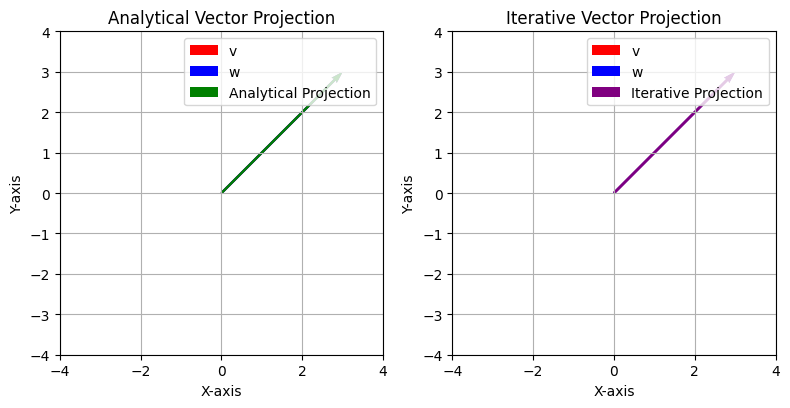

In [ ]:
import matplotlib.pyplot as plt


# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) # Adjusted figure size

# Set the x and y limits for both subplots
max_coord = max(np.max(np.abs(v)), np.max(np.abs(w)), np.max(np.abs(vector_projection_analytical)), np.max(np.abs(vector_projection_iterative))) + 1
for ax in axes:
    ax.set_xlim([-max_coord, max_coord])
    ax.set_ylim([-max_coord, max_coord])
    ax.grid()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X-axis') # Add x-axis label
    ax.set_ylabel('Y-axis') # Add y-axis label


# Plot the vectors and analytical projection in the first subplot
axes[0].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')
axes[0].quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='b', label='w')
axes[0].quiver(0, 0, vector_projection_analytical[0], vector_projection_analytical[1], angles='xy', scale_units='xy', scale=1, color='g', label='Analytical Projection')
axes[0].set_title('Analytical Vector Projection') # Add title
axes[0].legend()

# Plot the vectors and iterative projection in the second subplot
axes[1].quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')
axes[1].quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='b', label='w')
axes[1].quiver(0, 0, vector_projection_iterative[0], vector_projection_iterative[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Iterative Projection')
axes[1].set_title('Iterative Vector Projection') # Add title
axes[1].legend()

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

## Visualización del gradiente descendente

### Subtask:
Graficar la función de costo y mostrar cómo el valor de alpha converge hacia el mínimo a lo largo de las iteraciones del gradiente descendente.


**Reasoning**:
Generate a range of alpha values around the initial and final alpha values, calculate the cost function for each alpha, plot the cost function and the gradient descent trajectory, add labels, a title, and a legend, and display the plot.



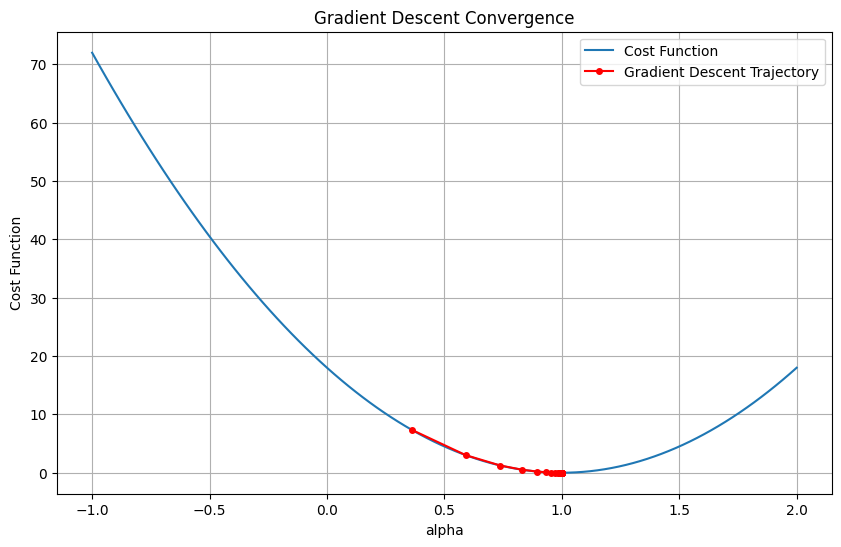

In [ ]:
import matplotlib.pyplot as plt


# Create a range of alpha values for plotting the cost function
alpha_range = np.linspace(min(alpha_initial, alpha_gd) - 1, max(alpha_initial, alpha_gd) + 1, 100)

# Calculate the cost function for each alpha in the range
cost_range = [cost_function(a, v, w) for a in alpha_range]

# Plot the cost function
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, cost_range, label='Cost Function')

# Overlay the gradient descent trajectory
plt.plot(alpha_history, cost_history, marker='o', linestyle='-', color='red', markersize=4, label='Gradient Descent Trajectory')

# Add labels, title, and legend
plt.xlabel('alpha') # Add x-axis label
plt.ylabel('Cost Function') # Add y-axis label
plt.title('Gradient Descent Convergence') # Add title
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analytical solution for the vector projection of `v = [3, 2]` onto `w = [1, 0]` resulted in a scalar projection of 3.0 and a vector projection of `[3. 0.]`.
*   The iterative gradient descent method successfully converged to an optimal scalar value ($\alpha$) of approximately 2.99999999, yielding an iterative vector projection of approximately `[2.99999999 0.]`.
*   The numerical difference between the analytical and iterative scalar projections was very small (approximately 0.00000001), and the difference in vector projections was also minimal, highlighting the accuracy of the iterative approach.
*   The visualizations confirmed that both the analytical and iterative vector projections lie along the direction of vector `w`, and are virtually identical.
*   The plot of the cost function and the gradient descent trajectory visually demonstrated the convergence of the gradient descent algorithm, showing how the value of $\alpha$ iteratively moved towards the minimum of the cost function.

### Insights or Next Steps

*   The close agreement between the analytical and iterative solutions demonstrates the effectiveness of gradient descent for solving optimization problems like finding the optimal scalar for vector projection.
*   For future work, one could explore the impact of different learning rates and numbers of iterations on the convergence speed and accuracy of the gradient descent process.
